## A) Research Question
Can a regression model be constructed on the research dataset?
#### Capstone Project Name
Multiple Linear Regression analysis on Rideshare dataset
#### Context
The contribution of this study to the field of data analytics and the MSDA program is to create a
regression model to find statistical significance between the dependent variable and the independent variables.
This study will allow for a better understanding of the patterns of the lifestyle, rush hour, and commuting
practices (Chao, 2019). It will also provide better understanding of the prices Uber and Lyft charges and what
factors into the price of a ride. Does location, time, day, and weather affect price? Does these also have an
effect on the surcharges? The multiple linear regression method is to estimate the different variables that affect
the pricing of Uber and Lyft rides.
#### Hypothesis
    Null hypothesis-. a predictive multiple linear regression cannot be constructed from the dataset
    
    Alternate Hypothesis-. a predictive multiple linear regression can be constructed from the dataset
#### Project Outcomes
This project is to create a multiple linear regression to assess the association of multiple
independent variables and a single dependent variable (Multiple linear regression analysis 2013). Support for
the alternative hypothesis is found in Chao (2019), where a linear regression model was performed and found
that there was significance between the variables and price of fares.

### B) Data Collection
The dataset will be downloaded from kaggle.com which is available to the public as a csv file. Two files will be given: a file of the cab ride and a file of the weather. It will be cleaned and preprocessed in Python. Two datasets will be used for this study. The first dataset contains data about the cab rides of Uber and Lyft. These variables include distance, cab_type, timestamp, destination, source, price, surcharge_multiplier, id, product id, and name. This dataset also contains over 693,000 rows of data and composed 10 columns. The second dataset contains data about the weather which includes numerical variables such as temp, clouds, pressure, rain, time_stamp, humidity, and wind and categorical variable 'location'. This dataset has over 6,200 rows of data and composed of 8 columns. 

The data sparsity is about 7.95% for the cab ride dataset
The data sparsity is about 11% for the weather dataset

Both datasets will be merged during the preprocessing portion. In order to merge the two data sets the ‘location’ variable from the weather dataset will be split into two separate datasets and renamed 'source' and 'destination' to merge with the variables 'source' and 'destination' from the cab ride dataset. 
Any values null will be dropped. The average of all the numerical variables in the weather dataset will be taken to represent the average weather conditions based on location. The cab ride dataset timestamp is in epoch format which will need to be converted to readable time data. ID and Product ID are not needed for this study and can be dropped in the cab ride dataset. The timestamp in the weather dataset will be dropped.

The advantage of using this dataset is that this dataset is made available to the public for other studies. The disadvantage of this dataset is the time frame of collecting data for this dataset was about a month and a half. 

The challenge faced on collecting this data was that this data used for the research question came in two files. The two files need to be merged into one file to properly utilize all the information for the study. 

### C) Data Extraction and Preparation
Python will be used due to the accessibility of the language; it can
work with large datasets and has a large library of packages that can run statistical analysis and data
analytics. It is a general-purpose programming language which means it can be used for numerous
applications. With Python compared to R, Python is the better option when it comes to how fast it runs in all
the environments than R (Python vs R: Know the difference 2022). When comparing Python to SAS, Python
is the better choice due to its accessibility. SAS is a commercial software program that needs to be
purchased while Python is an open-source programming language that is free to use (By admin, 2019). 

Descriptive statistics will be utilized to have a general overview of the datasets. To check for normality, a scatter plot will be used to see the relationship between the independent
variables and the target variable. Univariate and multivariate techniques will be performed, and graphical
visualizations will be created for visual understanding of the datasets. A Q-Q plot can be used to check normal
distribution (Lani, 2021). Outliers and null values will be omitted. Once the preprocessing techniques have been
performed, a regression model can be performed to see the correlations of the variables. A linear regression
model will be used to see if the dependent variable price can be explained by the predictor variables
(Assumptions of linear regression 2022).

Python will be used due to the accessibility of the language; it can
work with large datasets and has a large library of packages that can run statistical analysis and data
analytics. It is a general-purpose programming language which means it can be used for numerous
applications. With Python compared to R, Python is the better option when it comes to how fast it runs in all
the environments than R (Python vs R: Know the difference 2022). When comparing Python to SAS, Python
is the better choice due to its accessibility. SAS is a commercial software program that needs to be
purchased while Python is an open-source programming language that is free to use (By admin, 2019).

The advantage of using Python is the speed when running on all environments compared to R environments.

The disadvantage of using Python versus R or SAS is the visual power and capability. R and SAS is capable of creating beautiful and appealing graphical displays as with Python can look a bit outdated.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pylab
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.formula.api import logit
import statistics
from scipy import stats

import sklearn 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('cab_rides.csv')
df1.dataframeName = 'cab_rides.csv'
df2 = pd.read_csv('weather.csv')
df2.dataframeName = 'weather.csv'

In [3]:
df1

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


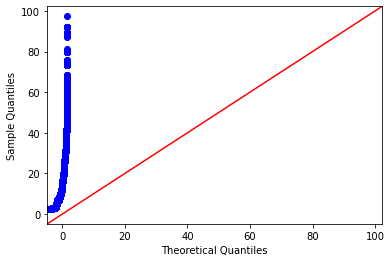

In [4]:
fig = sm.qqplot(df1['price'], line='45')
plt.show()

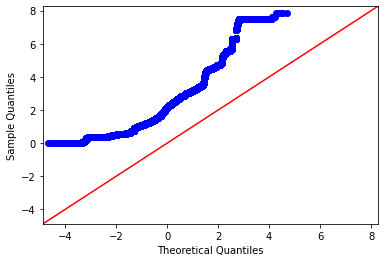

In [5]:
fig = sm.qqplot(df1['distance'], line='45')
plt.show()

In [6]:
df2

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


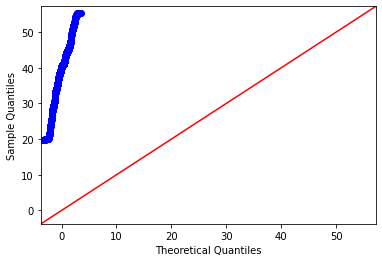

In [7]:
fig = sm.qqplot(df2['temp'], line='45')
plt.show()

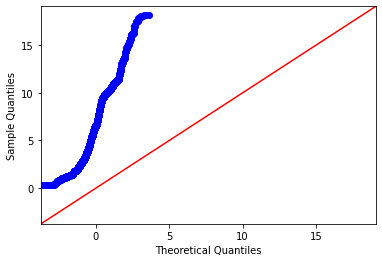

In [8]:
fig = sm.qqplot(df2['wind'], line='45')
plt.show()

In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
            plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [11]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [13]:
df1.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [68]:
df1.dropna(axis=0, inplace = True)

In [15]:
df1.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [17]:
df2.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [18]:
df2.fillna(0, inplace = True)

In [19]:
df2.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
rain          0
time_stamp    0
humidity      0
wind          0
dtype: int64

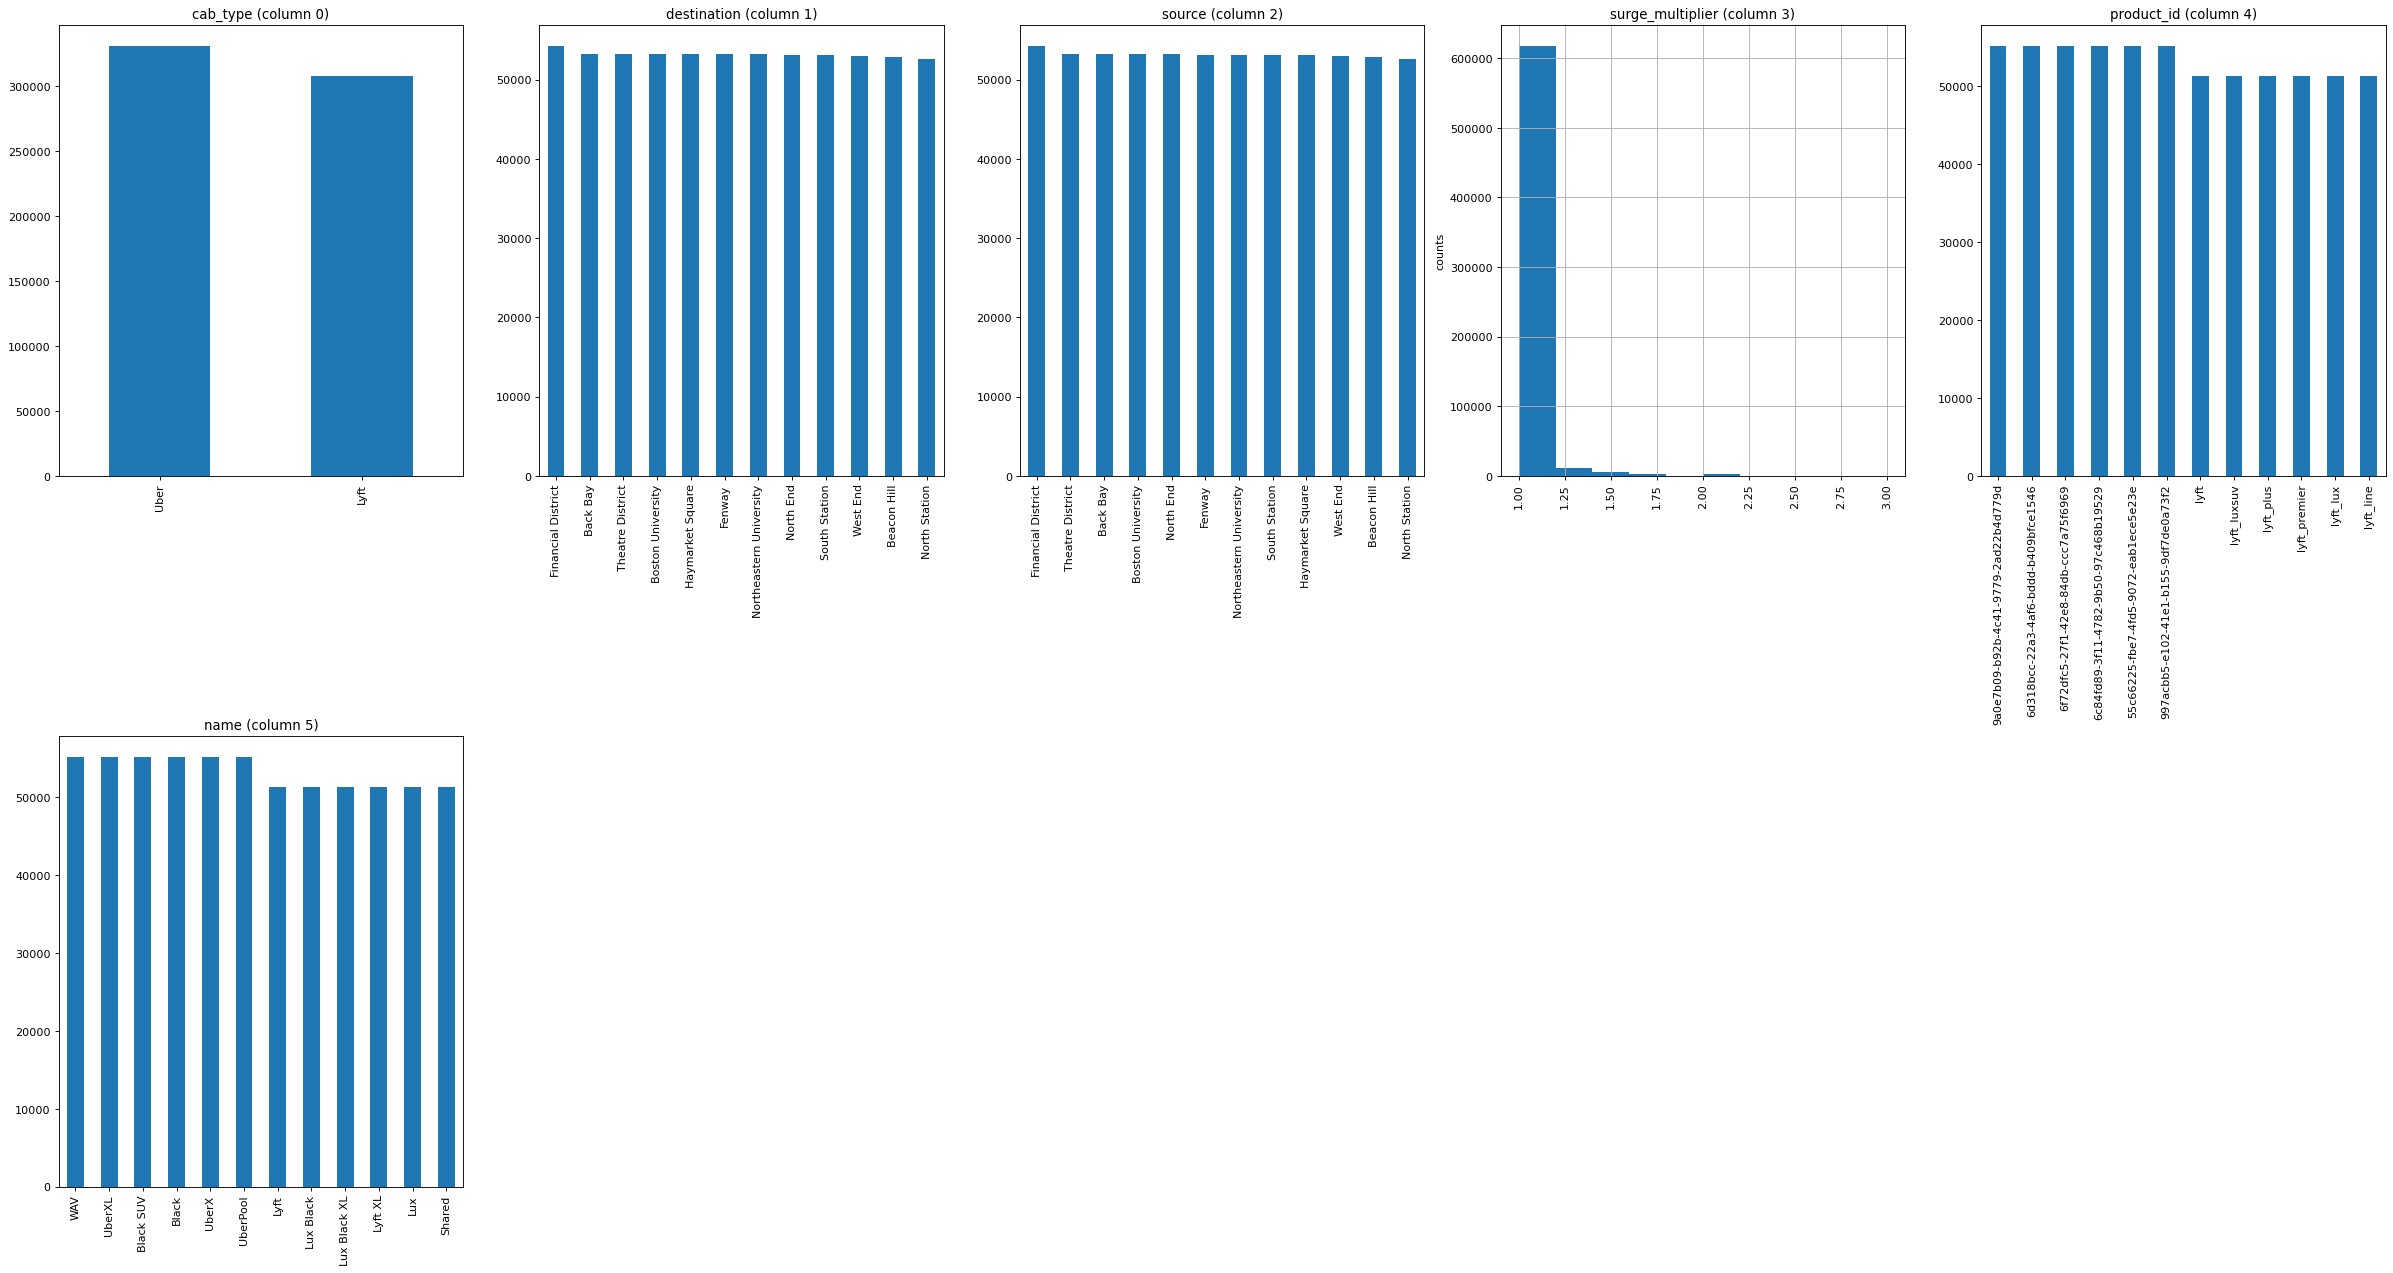

In [20]:
plotPerColumnDistribution(df1, 10, 5)

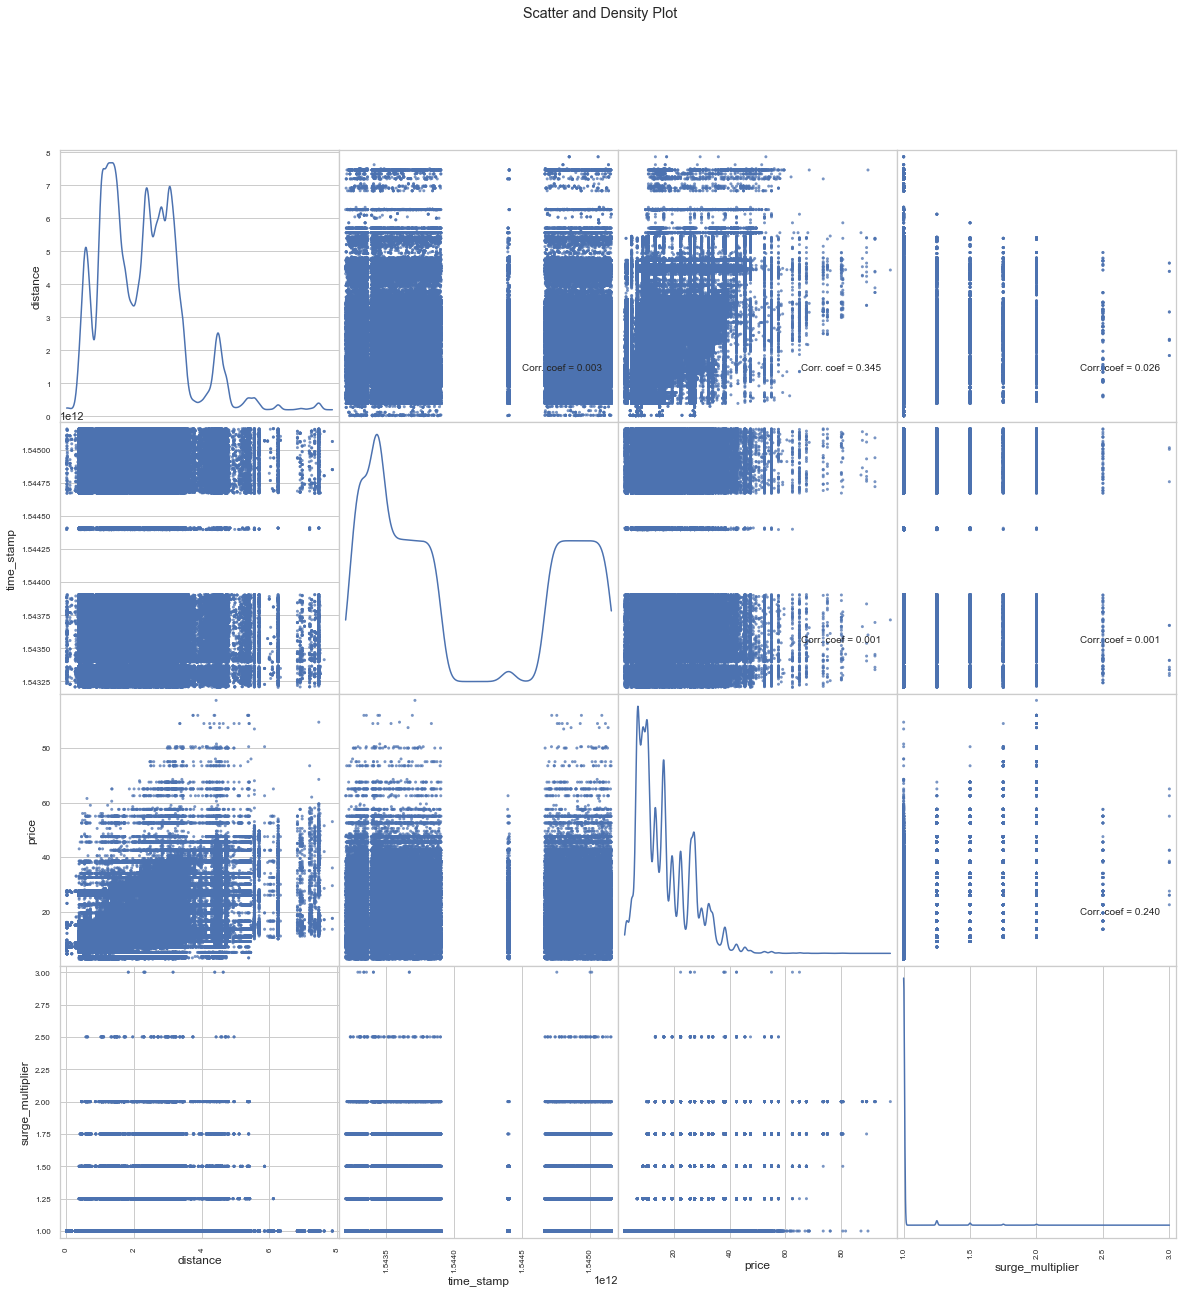

In [69]:
plotScatterMatrix(df1, 20, 10)

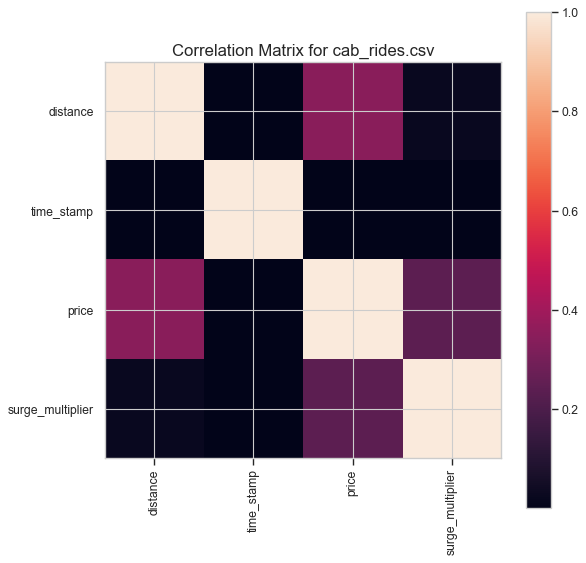

In [70]:
plotCorrelationMatrix(df1, 8)

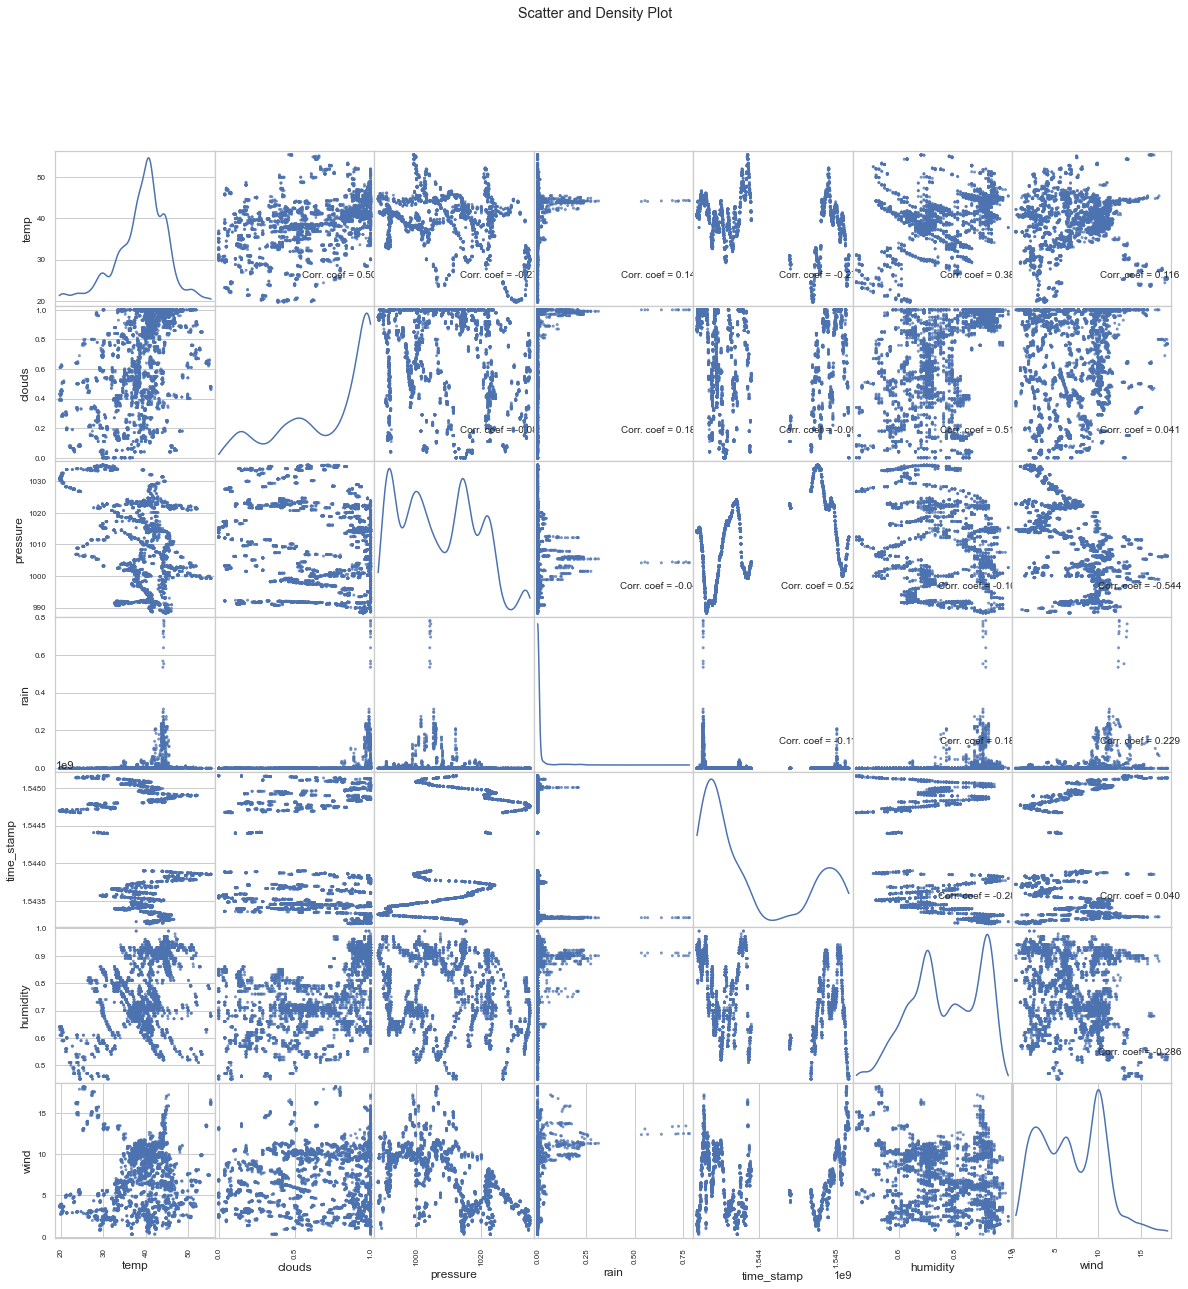

In [71]:
plotScatterMatrix(df2, 20, 10)

plotPerColumnDistribution(df2, 10, 5)

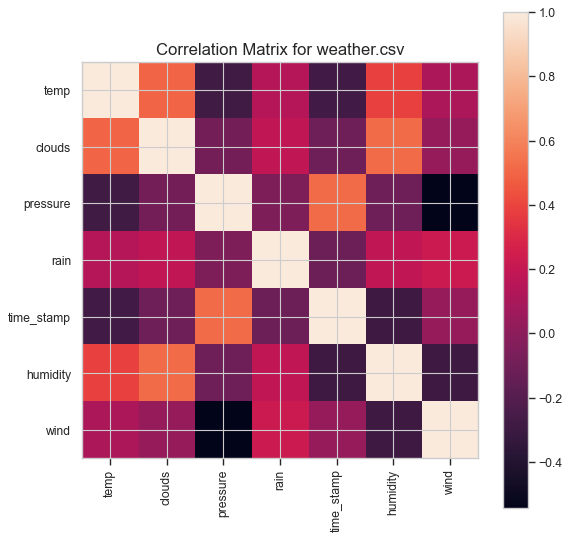

In [73]:
plotCorrelationMatrix(df2, 8)

In [21]:
df2_avg = df2.groupby('location').mean().reset_index()
df2_avg

,location,temp,clouds,pressure,rain,time_stamp,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,1.543857e+09,0.755468,6.848948


In [22]:
df2_avg.drop(columns='time_stamp', inplace=True)
df2_avg

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [23]:
df2_source = df2_avg.rename(columns = (lambda x :x+'_source'))
df2_source.rename(columns={'location_source' :'source'}, inplace= True)
df2_source

,source,temp_source,clouds_source,pressure_source,rain_source,humidity_source,wind_source
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [24]:
df2_destination = df2_avg.rename(columns = (lambda x :x+'_destination'))
df2_destination.rename(columns={'location_destination' :'destination'}, inplace= True)
df2_destination

,destination,temp_destination,clouds_destination,pressure_destination,rain_destination,humidity_destination,wind_destination
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [25]:
df1

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [26]:
df3 =df1\
    .merge(df2_source, on ='source')\
    .merge(df2_destination, on = 'destination')
df3.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp_source',
       'clouds_source', 'pressure_source', 'rain_source', 'humidity_source',
       'wind_source', 'temp_destination', 'clouds_destination',
       'pressure_destination', 'rain_destination', 'humidity_destination',
       'wind_destination'],
      dtype='object')

In [27]:
df3

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,pressure_source,rain_source,humidity_source,wind_source,temp_destination,clouds_destination,pressure_destination,rain_destination,humidity_destination,wind_destination
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,Lyft,1543218373178,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637972,0.99,Lyft,1543218373178,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637973,0.99,Lyft,1543465761522,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637974,0.99,Lyft,1544762405152,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


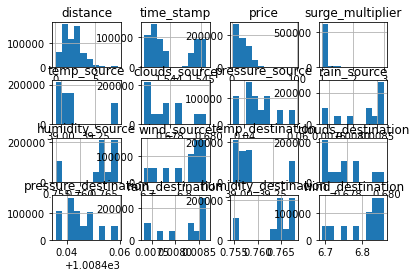

In [28]:
df3.hist(['distance', 'cab_type', 'time_stamp', 'price',
       'surge_multiplier','temp_source',
       'clouds_source', 'pressure_source', 'rain_source', 'humidity_source',
       'wind_source', 'temp_destination', 'clouds_destination',
       'pressure_destination', 'rain_destination', 'humidity_destination',
       'wind_destination'])
plt.show()

In [29]:
df3_stat= df3.describe()
print(df3_stat)

            distance    time_stamp          price  surge_multiplier  \
count  637976.000000  6.379760e+05  637976.000000     637976.000000   
mean        2.189261  1.544046e+12      16.545125          1.015068   
std         1.135413  6.892028e+08       9.324359          0.095422   
min         0.020000  1.543204e+12       2.500000          1.000000   
25%         1.270000  1.543444e+12       9.000000          1.000000   
50%         2.160000  1.543737e+12      13.500000          1.000000   
75%         2.930000  1.544828e+12      22.500000          1.000000   
max         7.860000  1.545161e+12      97.500000          3.000000   

         temp_source  clouds_source  pressure_source    rain_source  \
count  637976.000000  637976.000000    637976.000000  637976.000000   
mean       39.091088       0.677776      1008.445196       0.008212   
std         0.145908       0.000980         0.006164       0.000478   
min        38.964379       0.676711      1008.435793       0.007343   
25%  

plotPerColumnDistribution(df3, 10, 5)

plotScatterMatrix(df3, 20, 10)

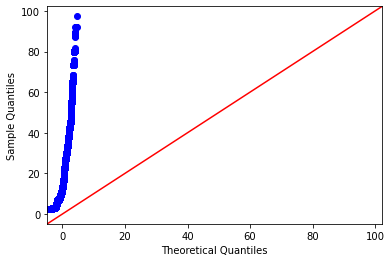

In [30]:
fig = sm.qqplot(df3['price'], line='45')
plt.show()

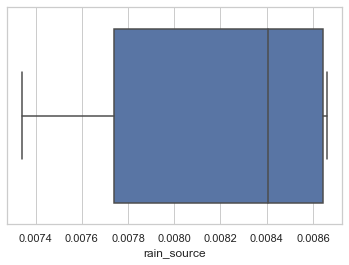

In [31]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df3["rain_source"])

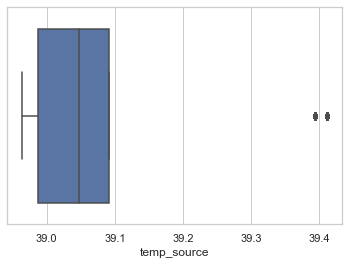

In [32]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df3["temp_source"])

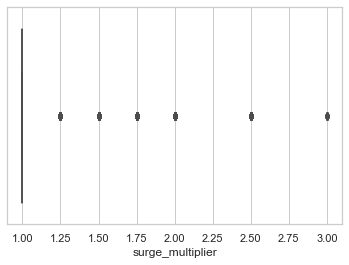

In [33]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df3["surge_multiplier"])

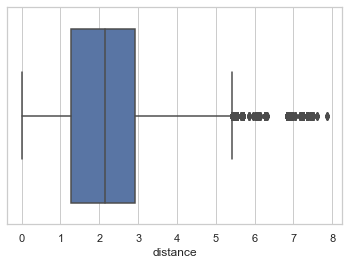

In [34]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df3["distance"])

In [35]:
for x in ['distance']:
    q75,q25 = np.percentile(df3.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df3.loc[df3[x] < min,x] = np.nan
    df3.loc[df3[x] > max,x] = np.nan
    

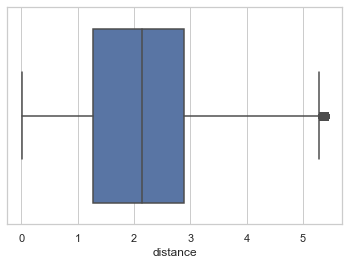

In [36]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df3["distance"])

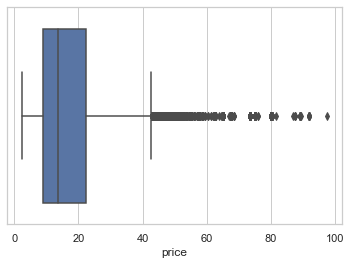

In [37]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df3["price"])

In [38]:
for x in ['price']:
    q75,q25 = np.percentile(df3.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df3.loc[df3[x] < min,x] = np.nan
    df3.loc[df3[x] > max,x] = np.nan
    

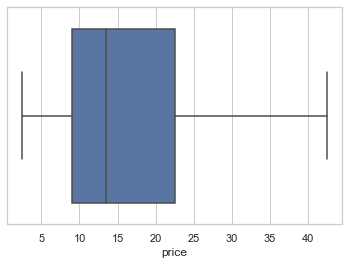

In [39]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df3["price"])

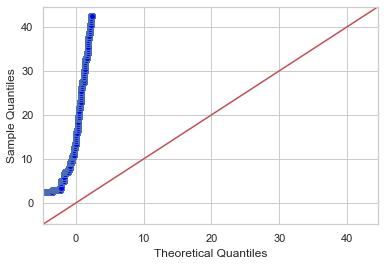

In [40]:
fig = sm.qqplot(df3['price'], line='45')
plt.show()

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   distance              631304 non-null  float64
 1   cab_type              637976 non-null  object 
 2   time_stamp            637976 non-null  int64  
 3   destination           637976 non-null  object 
 4   source                637976 non-null  object 
 5   price                 632387 non-null  float64
 6   surge_multiplier      637976 non-null  float64
 7   id                    637976 non-null  object 
 8   product_id            637976 non-null  object 
 9   name                  637976 non-null  object 
 10  temp_source           637976 non-null  float64
 11  clouds_source         637976 non-null  float64
 12  pressure_source       637976 non-null  float64
 13  rain_source           637976 non-null  float64
 14  humidity_source       637976 non-null  float64
 15  

In [42]:
df3.dropna(axis=0, inplace = True)

In [43]:
df3.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price                   0
surge_multiplier        0
id                      0
product_id              0
name                    0
temp_source             0
clouds_source           0
pressure_source         0
rain_source             0
humidity_source         0
wind_source             0
temp_destination        0
clouds_destination      0
pressure_destination    0
rain_destination        0
humidity_destination    0
wind_destination        0
dtype: int64

In [44]:
df3time = pd.to_datetime(df3['time_stamp'], unit='ms')

In [45]:
df3time

0        2018-12-16 09:30:07.890
1        2018-11-27 02:00:23.677
2        2018-11-28 01:00:22.198
3        2018-11-30 04:53:02.749
4        2018-11-29 03:49:20.223
                   ...          
637971   2018-11-26 07:46:13.178
637972   2018-11-26 07:46:13.178
637973   2018-11-29 04:29:21.522
637974   2018-12-14 04:40:05.152
637975   2018-12-14 04:40:05.152
Name: time_stamp, Length: 626662, dtype: datetime64[ns]

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626662 entries, 0 to 637975
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   distance              626662 non-null  float64
 1   cab_type              626662 non-null  object 
 2   time_stamp            626662 non-null  int64  
 3   destination           626662 non-null  object 
 4   source                626662 non-null  object 
 5   price                 626662 non-null  float64
 6   surge_multiplier      626662 non-null  float64
 7   id                    626662 non-null  object 
 8   product_id            626662 non-null  object 
 9   name                  626662 non-null  object 
 10  temp_source           626662 non-null  float64
 11  clouds_source         626662 non-null  float64
 12  pressure_source       626662 non-null  float64
 13  rain_source           626662 non-null  float64
 14  humidity_source       626662 non-null  float64
 15  

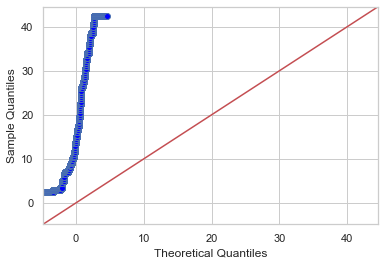

In [47]:
fig = sm.qqplot(df3['price'], line='45')
plt.show()

cat_data = df3.select_dtypes('object').columns.tolist()
cat_data

for cat in cat_data:
    print('category : ' , cat)
    print(df3[cat].value_counts())
    print('\n')
    

In [48]:
df3 = df3.drop(['id','product_id'], axis=1)
df3['cab_type']=df3['cab_type'].replace({'Uber':1, 'Lyft':0})
df3['cab_type'].value_counts()

1    323699
0    302963
Name: cab_type, dtype: int64

In [49]:
df3

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,name,temp_source,clouds_source,pressure_source,rain_source,humidity_source,wind_source,temp_destination,clouds_destination,pressure_destination,rain_destination,humidity_destination,wind_destination
0,0.44,0,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,0,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,0,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,0,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,0,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,0,1543218373178,Haymarket Square,Financial District,27.5,1.0,Lux Black XL,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637972,0.99,0,1543218373178,Haymarket Square,Financial District,5.0,1.0,Shared,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637973,0.99,0,1543465761522,Haymarket Square,Financial District,16.5,1.0,Lux Black,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637974,0.99,0,1544762405152,Haymarket Square,Financial District,10.5,1.0,Lyft XL,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


In [50]:
def one_hot_encode(df , column, prefix):
    dummy = pd.get_dummies(df[column] , prefix = prefix)
    df = pd.concat([df, dummy], axis =1)
    df = df.drop(column, axis=1)
    
    return df

cat_data

In [51]:
df3.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'temp_source', 'clouds_source',
       'pressure_source', 'rain_source', 'humidity_source', 'wind_source',
       'temp_destination', 'clouds_destination', 'pressure_destination',
       'rain_destination', 'humidity_destination', 'wind_destination'],
      dtype='object')

In [52]:
df3 = one_hot_encode(df3 , column = 'destination', prefix='desti')
df3 = one_hot_encode(df3 , column = 'source', prefix='src')
df3 = one_hot_encode(df3 , column = 'name', prefix='nm')

In [53]:
df3.select_dtypes('object').columns

Index([], dtype='object')

## D) Analysis

#### Explanation of Linear Regression

In this analysis a multiple linear regression is used to predict the outcome of the dependent variable ('price'). Multiple linear regression is a statistical technique which uses multiple explanatory or independent variables to predict the response or dependent variable (Hayes, 2022). The technique used are as followed:

- split the data in dependent and independent variables
- split the data into train and test sets
- shape the train and test sets
- train and fit the model
- Review the regression coefficients 
- evaluate the model with predicted values, run R-squared score, MAE, MSE, and RMSE


One advantage of performing this analysis helps provide insights on predicting future pricing of fare rides. 

One disadvantage of performing this technique that the data is not normally distributed making the linear regression model difficult to interpret.


In [54]:
df3.columns

Index(['distance', 'cab_type', 'time_stamp', 'price', 'surge_multiplier',
       'temp_source', 'clouds_source', 'pressure_source', 'rain_source',
       'humidity_source', 'wind_source', 'temp_destination',
       'clouds_destination', 'pressure_destination', 'rain_destination',
       'humidity_destination', 'wind_destination', 'desti_Back Bay',
       'desti_Beacon Hill', 'desti_Boston University', 'desti_Fenway',
       'desti_Financial District', 'desti_Haymarket Square', 'desti_North End',
       'desti_North Station', 'desti_Northeastern University',
       'desti_South Station', 'desti_Theatre District', 'desti_West End',
       'src_Back Bay', 'src_Beacon Hill', 'src_Boston University',
       'src_Fenway', 'src_Financial District', 'src_Haymarket Square',
       'src_North End', 'src_North Station', 'src_Northeastern University',
       'src_South Station', 'src_Theatre District', 'src_West End', 'nm_Black',
       'nm_Black SUV', 'nm_Lux', 'nm_Lux Black', 'nm_Lux Black XL', 

In [55]:
df3= df3[['distance', 'cab_type', 'time_stamp', 'surge_multiplier',
       'temp_source', 'clouds_source', 'pressure_source', 'rain_source',
       'humidity_source', 'wind_source', 'temp_destination',
       'clouds_destination', 'pressure_destination', 'rain_destination',
       'humidity_destination', 'wind_destination', 'desti_Back Bay',
       'desti_Beacon Hill', 'desti_Boston University', 'desti_Fenway',
       'desti_Financial District', 'desti_Haymarket Square', 'desti_North End',
       'desti_North Station', 'desti_Northeastern University',
       'desti_South Station', 'desti_Theatre District', 'desti_West End',
       'src_Back Bay', 'src_Beacon Hill', 'src_Boston University',
       'src_Fenway', 'src_Financial District', 'src_Haymarket Square',
       'src_North End', 'src_North Station', 'src_Northeastern University',
       'src_South Station', 'src_Theatre District', 'src_West End', 'nm_Black',
       'nm_Black SUV', 'nm_Lux', 'nm_Lux Black', 'nm_Lux Black XL', 'nm_Lyft',
       'nm_Lyft XL', 'nm_Shared', 'nm_UberPool', 'nm_UberX', 'nm_UberXL',
       'nm_WAV', 'price']]

In [56]:
x = pd.DataFrame(df3.iloc[:,:-1])
y = pd.DataFrame(df3.iloc[:,-1])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 52)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

sc=StandardScaler()
sc.fit(x_train)

x_train = pd.DataFrame(sc.transform(x_train), columns = x.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns= x.columns)

(438663, 52) (187999, 52) (438663, 1) (187999, 1)


In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(438663, 52)
(187999, 52)
(438663, 1)
(187999, 1)


In [59]:
x_train

,distance,cab_type,time_stamp,surge_multiplier,temp_source,clouds_source,pressure_source,rain_source,humidity_source,wind_source,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
0,-0.385825,-1.032015,-0.359791,-0.147847,-0.708373,-0.016101,-0.083264,0.400434,0.951581,0.578944,...,-0.297774,-0.296302,-0.288210,-0.29864,3.345474,-0.297869,-0.307246,-0.30678,-0.306615,-0.307011
1,0.176705,0.968978,1.550743,-0.147847,-0.043095,0.668002,0.420291,-0.600505,0.005764,-0.443031,...,-0.297774,-0.296302,-0.288210,-0.29864,-0.298911,-0.297869,-0.307246,-0.30678,3.261420,-0.307011
2,0.310186,0.968978,-0.742916,-0.147847,-0.864094,2.133936,1.314805,-1.816244,0.776259,-1.667159,...,-0.297774,-0.296302,-0.288210,-0.29864,-0.298911,-0.297869,-0.307246,-0.30678,3.261420,-0.307011
3,-0.700461,0.968978,1.140206,-0.147847,-0.043095,0.668002,0.420291,-0.600505,0.005764,-0.443031,...,-0.297774,-0.296302,-0.288210,-0.29864,-0.298911,-0.297869,-0.307246,-0.30678,-0.306615,3.257215
4,-1.663436,0.968978,1.194183,-0.147847,2.248849,-1.071573,-1.547013,0.732217,-2.222672,1.050167,...,-0.297774,-0.296302,-0.288210,-0.29864,-0.298911,-0.297869,-0.307246,-0.30678,-0.306615,-0.307011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438658,0.805975,0.968978,0.932529,-0.147847,-0.282808,1.488925,2.290638,-0.991777,-0.063442,-2.025219,...,-0.297774,-0.296302,-0.288210,-0.29864,-0.298911,-0.297869,-0.307246,-0.30678,-0.306615,-0.307011
438659,1.130145,-1.032015,-0.930686,2.859854,-0.369468,-0.797932,-0.399158,0.910685,0.361022,0.605571,...,-0.297774,-0.296302,3.469692,-0.29864,-0.298911,-0.297869,-0.307246,-0.30678,-0.306615,-0.307011
438660,-1.425075,-1.032015,-0.271849,-0.147847,-0.142287,-1.091119,-0.001944,0.933443,0.190314,0.741857,...,3.358251,-0.296302,-0.288210,-0.29864,-0.298911,-0.297869,-0.307246,-0.30678,-0.306615,-0.307011
438661,-1.663436,0.968978,-0.604896,-0.147847,2.248849,-1.071573,-1.547013,0.732217,-2.222672,1.050167,...,-0.297774,-0.296302,-0.288210,-0.29864,-0.298911,-0.297869,-0.307246,-0.30678,-0.306615,-0.307011


In [60]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print('r2 test score is: ',(lr.score(x_test, y_test)))

r2 test score is:  0.9372067305126086


In [61]:
y_pred = lr.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,19.893550
1,19.327388
2,28.841548
3,7.343562
4,30.056636
...,...
187994,6.613276
187995,27.225093
187996,6.553279
187997,22.374995


In [62]:
v = pd.DataFrame(lr.coef_,index=['Coefficient']).transpose()
w = pd.DataFrame(x.columns, columns=['Attribute'])

In [63]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,Coefficient
0,distance,3.065860e+00
1,cab_type,5.919603e+11
2,time_stamp,2.184225e-03
3,surge_multiplier,1.148443e+00
4,temp_source,-1.309740e+11
5,clouds_source,-1.273579e+12
6,pressure_source,-1.464306e+12
7,rain_source,-1.611289e+12
8,humidity_source,4.690373e+11
9,wind_source,-1.357571e+11


In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squred Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6253340937596659
Mean Squared Error: 4.812014155266201
Root Mean Squred Error: 2.193630359761234


In [65]:
df3['intercept']=1
lm_price =sm.OLS(df3['price'], df3[['distance', 'cab_type', 'price', 'surge_multiplier',
       'temp_source', 'clouds_source', 'pressure_source', 'rain_source',
       'humidity_source', 'wind_source', 'temp_destination',
       'clouds_destination', 'pressure_destination', 'rain_destination',
       'humidity_destination', 'wind_destination', 'desti_Back Bay',
       'desti_Beacon Hill', 'desti_Boston University', 'desti_Fenway',
       'desti_Financial District', 'desti_Haymarket Square', 'desti_North End',
       'desti_North Station', 'desti_Northeastern University',
       'desti_South Station', 'desti_Theatre District', 'desti_West End',
       'src_Back Bay', 'src_Beacon Hill', 'src_Boston University',
       'src_Fenway', 'src_Financial District', 'src_Haymarket Square',
       'src_North End', 'src_North Station', 'src_Northeastern University',
       'src_South Station', 'src_Theatre District', 'src_West End', 'nm_Black',
       'nm_Black SUV', 'nm_Lux', 'nm_Lux Black', 'nm_Lux Black XL', 'nm_Lyft',
       'nm_Lyft XL', 'nm_Shared', 'nm_UberPool', 'nm_UberX', 'nm_UberXL',
       'nm_WAV','intercept']]).fit()

In [66]:
print(lm_price.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.487e+09
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:59:17   Log-Likelihood:             1.4712e+06
No. Observations:              626662   AIC:                        -2.942e+06
Df Residuals:                  626625   BIC:                        -2.942e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
distance      

## Data Summary and Implications
## E)

Upon completion of the analysis it was found that the multiple linear regression model was able to perform with an r2 test score of 93.7% meaning that the response variable can be explained by the predictor variable. The model was also evaluated by performing the MAE, and RMSE: 
- The Mean Absolute Error (MAE) score explains the average absolute error between the actual and the predicted values (Allwright, 2022). A score close to 0 would mean an accurate model. The calculated score of 1.6 based on the scale of the target data, explains that the model was pretty accurate at predicting prices in the model. 
- The Root Mean Squared Error (RMSE) explains the square root of the difference between predicted and actual values averaged and squared (Zach, 2021). The RMSE units measured is the same as the units of the response variable which helps better understand the analysis. The scored is based on how low the score is relative to the target dataset. With the calculated RMSE score of 2.2 shows that the score is low meaning the model is fit for the dataset. 

#### Conclusions
- Based on the study of this analysis it was found that the data a bit unwieldly. The dataset was difficult to manage as two datasets were merged. A quick glance at the qq-plot demonstrated that the data was not normal to begin with. The final conclusion to this report after performing the ordinary least squares method found that the p-values for the independent variables were not significant to the dependent variable suggesting that we failed to reject the null hypothesis. The course of action is to possibly reformulate a better hypothesis or look into different methods of data preparation in order to get a more normal dataset. 

#### Suggestions for future studies
For future studies two suggested approaches are:
- Performing dimensionality reduction with PCAs for a more accurate model
- Performing a different statistical methods such as ANOVA test which could futher clarify fare pricing between mul


## F) Acknowledge sources 
### In-text citations
- Allwright, S. (2022, August 28). What is a good MAE score? (simply explained). Stephen Allwright. Retrieved October 22, 2022, from https://stephenallwright.com/good-mae-score/ 
- Assumptions of linear regression. Statistics Solutions. (2022, July 
7). Retrieved July 23, 2022, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
- Boston University School of Public Health. (2013, January 17). Multiple linear regression analysis. Retrieved July 27, 2022, from https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_multivariable/bs704_multivariable7.html
- By admin (Ed.). (2019, August 22). SAS vs python: 7 best differences you should know. CourseMentor. Retrieved July 26, 2022, from https://coursementor.com/blog/sas-vs-python/
- Chao, Junzhi. (2019). Modeling and Analysis of Uber’s Rider Pricing. https://www.researchgate.net/publication/338438722_Modeling_and_Analysis_of_Uber's_Rider_Pricing
- Hayes, A. (2022, September 12). Multiple linear regression (MLR) definition, formula, and example. Investopedia. Retrieved October 5, 2022, from https://www.investopedia.com/terms/m/mlr.asp#:~:text=A%20multiple%20regression%20considers%20the,variables%20in%20the%20model%20constant. 
- Lani, J. (2021, August 11). Assumptions of multiple linear regression. Statistics Solutions. Retrieved July 27, 2022, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/#:~:text=Multivariate%20Normality%E2%80%93Multiple%20regression%20assumes,Inflation%20Factor%20(VIF)%20values.
- Python vs R: Know the difference. InterviewBit. (2022, June 23). Retrieved July 26, 2022, from https://www.interviewbit.com/blog/python-vs-r/
- Terra, J. (2021, July 22). Python for data science and data analysis. Simplilearn.com. Retrieved July 16, 2022, from https://www.simplilearn.com/why-python-is-essential-for-data-analysis-article#:~:text=Thanks%20to%20Python&#39;s%20focus%20on,needs%20when%20using%20older%20languages.
- Zach. (2021, September 30). MSE vs. RMSE: Which metric should you use? Statology. Retrieved October 22, 2022, from https://www.statology.org/mse-vs-rmse/ 

### Third Party Sources
- Gupta, R. (2022, July 14). Uber fare prediction. Kaggle. Retrieved October 11, 2022, from https://www.kaggle.com/code/rajg28/uber-fare-prediction 
- Linear regression in python - simple &amp; multiple linear regression. Intellipaat Blog. (2022, January 1). Retrieved October 11, 2022, from https://intellipaat.com/blog/what-is-linear-regression/
- python, ask. (2020, October 19). Detection and removal of outliers in python - an easy to understand guide. AskPython. Retrieved October 11, 2022, from https://www.askpython.com/python/examples/detection-removal-outliers-in-python

In [67]:
from platform import python_version

print(python_version())

3.8.5
